In [9]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install scipy


   gender  minority  deprived      C_we      C_wk      G_we      G_wk  \
0       0         0         0  2.161295  1.757845  0.546168  0.276158   
1       0         0         1  2.267484  1.905672  0.780982  0.443723   
2       0         1         0  2.638829  2.109425  0.567535  0.266917   
3       0         1         1  2.584648  2.111844  0.606881  0.298273   
4       1         0         0  1.979514  1.565484  2.936909  1.776643   
5       1         0         1  2.124120  1.700109  3.416328  2.207644   
6       1         1         0  2.222695  1.758594  2.383937  1.120627   
7       1         1         1  2.303168  1.829752  2.518846  1.216497   

       S_we      S_wk      T_we      T_wk  
0  4.055682  3.335789  3.577467  2.515796  
1  4.573700  3.928463  3.908556  2.872346  
2  3.824919  3.071563  3.743690  2.417562  
3  4.037463  3.299565  3.954515  2.654610  
4  2.645646  2.148739  3.365676  2.373235  
5  3.039159  2.559334  3.750620  2.733766  
6  2.814268  2.207028  3.571646  2

<Figure size 1600x1200 with 0 Axes>

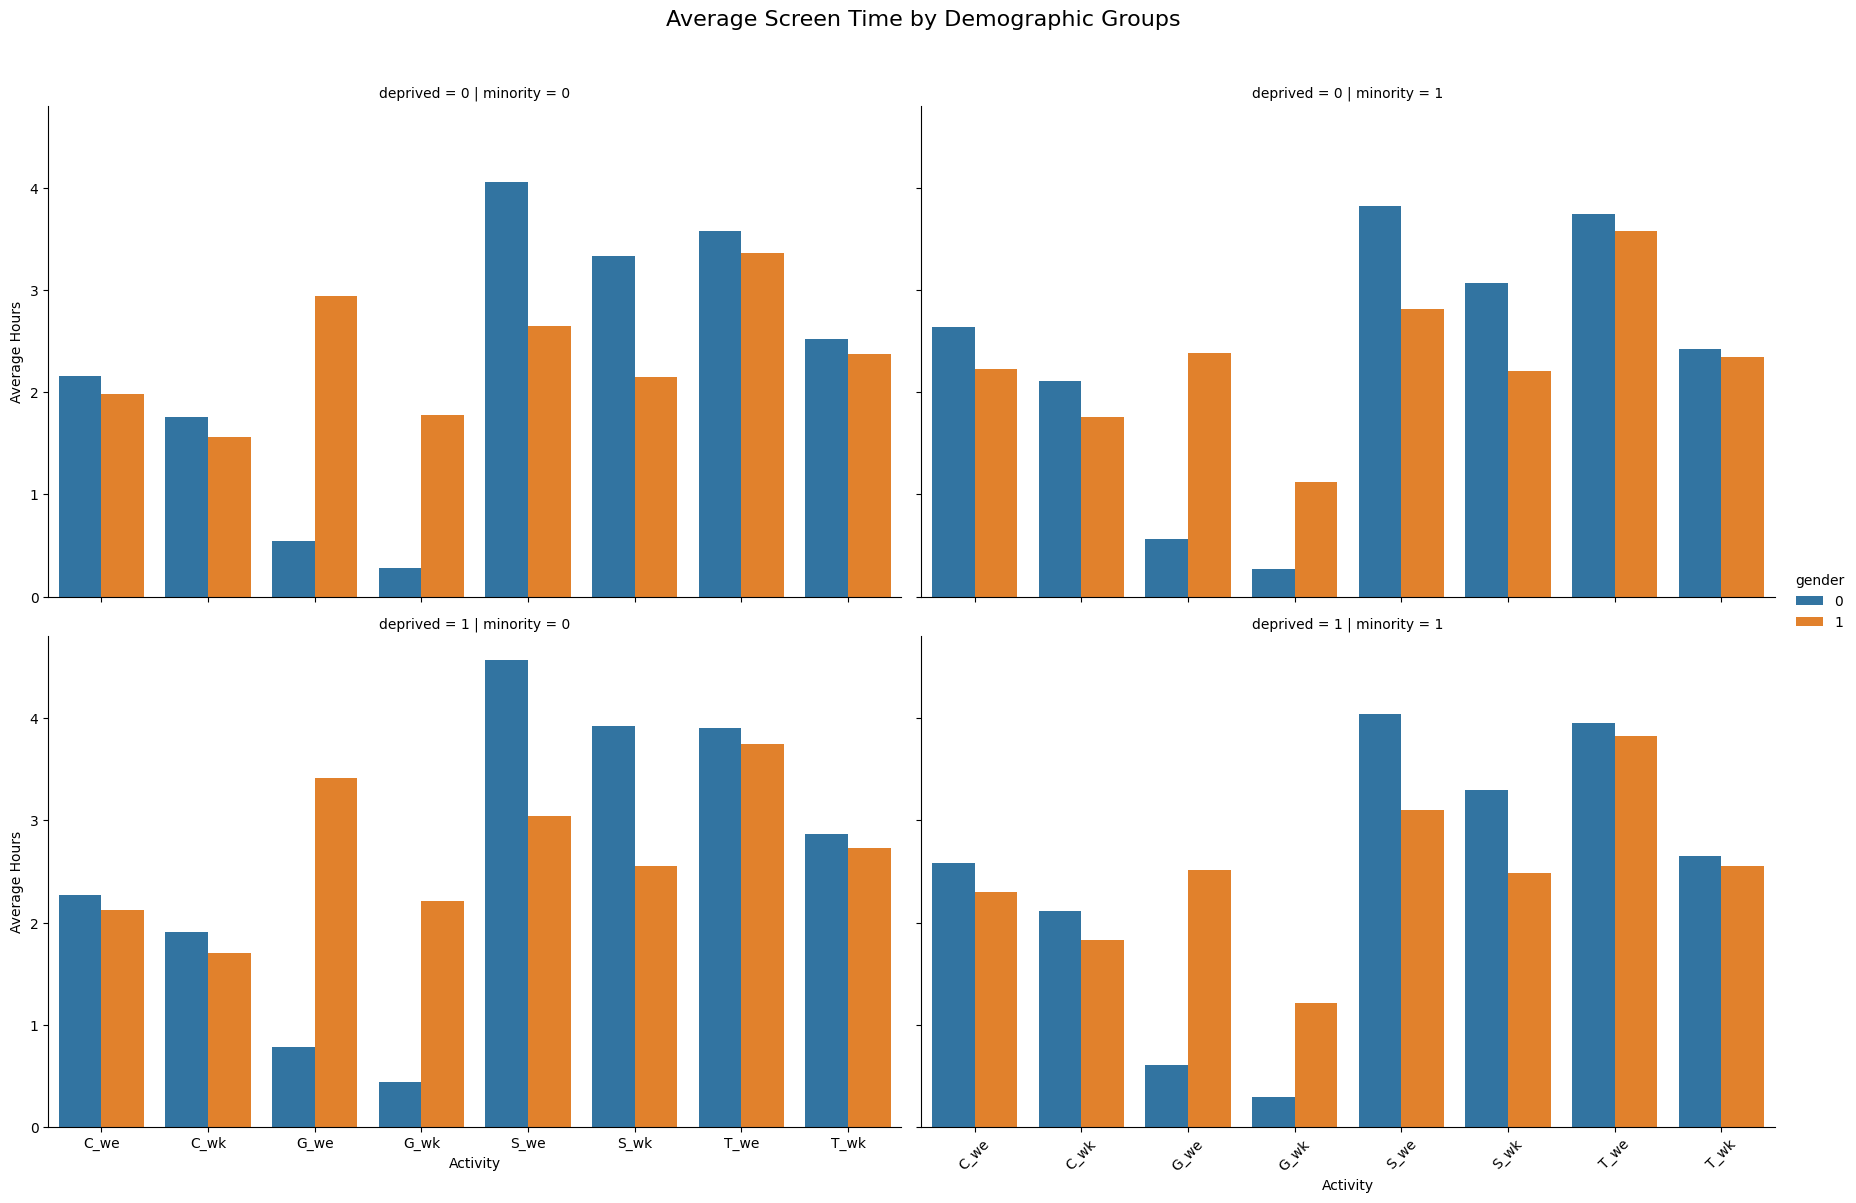

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
screen_time_data = pd.read_csv('/dataset2.csv')  # Contains screen time data
demographic_data = pd.read_csv('/dataset1.csv')  # Contains demographic info

# Merge datasets on ID
merged_data = pd.merge(screen_time_data, demographic_data, on='ID')

# Calculate average screen time by demographic groups
# Group by demographics and calculate the mean for each screen time activity
average_screen_time = merged_data.groupby(['gender', 'minority', 'deprived'])[['C_we', 'C_wk', 'G_we', 'G_wk', 'S_we', 'S_wk', 'T_we', 'T_wk']].mean().reset_index()

# Print average screen time
print(average_screen_time)

# Melt data for easier plotting
melted_data = average_screen_time.melt(id_vars=['gender', 'minority', 'deprived'],
                                        value_vars=['C_we', 'C_wk', 'G_we', 'G_wk', 'S_we', 'S_wk', 'T_we', 'T_wk'],
                                        var_name='Activity',
                                        value_name='Average Hours')

# Plot average screen time by demographic groups
plt.figure(figsize=(16, 12))

# Create bar plots for average screen time
sns.catplot(x='Activity', y='Average Hours', hue='gender', col='minority', row='deprived', kind='bar', data=melted_data, height=6, aspect=1.5)
plt.xticks(rotation=45)
plt.subplots_adjust(top=0.9)
plt.suptitle('Average Screen Time by Demographic Groups', fontsize=16)

plt.show()


In [ ]:
average_screen_time.to_png('ast.png')

AttributeError: 'DataFrame' object has no attribute 'to_png'